Physics 474 - Spring 2023 <br>
Homework 1 

<font color='red'>Author: RJ Young

_________________________________________________________________________________
In this homework we will practice fitting a function with parameters to some data.

skills we will excercise:
- reading in data
- plotting data
- writing user defined functions
- fitting a function to data with 'curve_fit'
- calculating $\chi^2$ and $\chi^2$ probaility
- plotting residuals
- analyzing data and making observations

The data we will be using is global temperature data compiled from 
The current citation for this dataset is: 
 
    Rohde, R. A. and Hausfather, Z.: The Berkeley Earth Land/Ocean Temperature
    Record, Earth Syst. Sci. Data, 12, 3469�3479, 
    https://doi.org/10.5194/essd-12-3469-2020, 2020.

 Data is: year, month, delta_T(C), T_error(C)
 
 where delta_T = Temp - (Jan 1951-Dec 1980 global mean temperature)
 
 Estimated Jan 1951-Dec 1980 global mean temperature (C)
   Using air temperature above sea ice:   14.105 +/- 0.022

The data is provided in a comma-separated-value file named 'global_temps_datafile.csv'

Note that the temperature data is provided as a $\Delta T$ from the global mean 1951-1980 temperature
of

$T_{mean}^{51-80}= 14.105 \pm 0.022 \, ^{\circ}C$
________________________________________________________________________________

Part 1) (1 pt)

Read in the data file and print the shape of the file



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

data = np.loadtxt('global_temps_datafile.csv',delimiter=',')
print(data)
print("")
print("Shape of data: " + str(data.shape))

[[ 1.850e+03  1.000e+00 -7.360e-01  3.890e-01]
 [ 1.850e+03  2.000e+00 -2.020e-01  5.260e-01]
 [ 1.850e+03  3.000e+00 -3.630e-01  3.330e-01]
 ...
 [ 2.022e+03  8.000e+00  9.710e-01  5.400e-02]
 [ 2.022e+03  9.000e+00  9.000e-01  4.400e-02]
 [ 2.022e+03  1.000e+01  1.058e+00  5.500e-02]]

Shape of data: (2074, 4)


____________________________________________________
Part 2) (4 pts)

Plot 
- the data points with errorbars vs year.
- a horizontal line at $T_{mean}^{51-80}= 14.105 \, ^{\circ}C$
- suggestion: use "alpha=0.2" in plotting data points

About errors: There are three errors that need to be added in quadrature
- the error on each of the measurements $\sigma_T$ from the file
- error on the $T_{mean}^{51-80}$ of $\sigma_{T_{mean}} = 0.022$
- a random systematic error of $\sigma_{sys}=0.13$

Recall from lecture then 

$\sigma_{tot}^2 = \sigma_T^2 + \sigma_{T_{mean}}^2 + \sigma_{sys}^2$

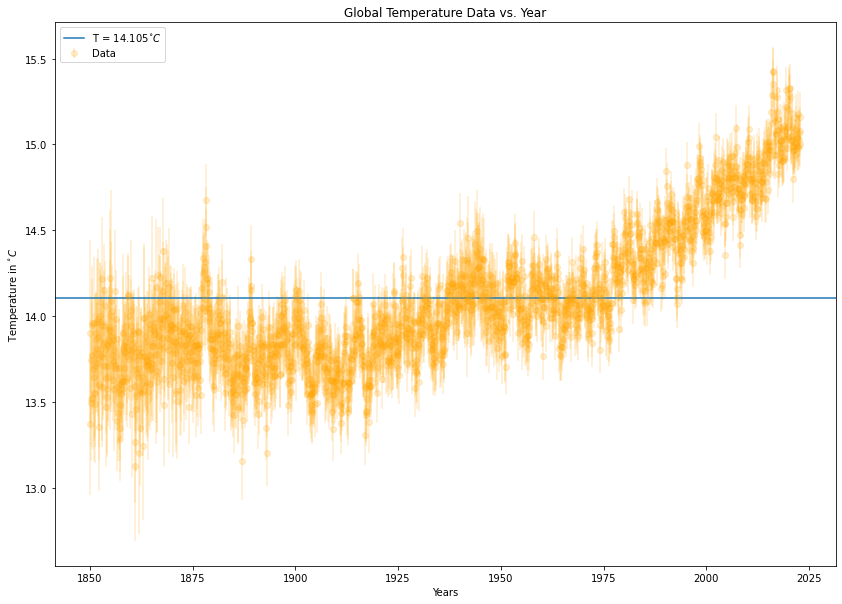

In [2]:
data_years = data[:,0] + (data[:,1]/12)
data_temp = data[:,2] + 14.105
data_err = np.sqrt((data[:,3])**2 + (0.022)**2 + (0.13)**2)

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp, yerr = data_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.axhline(14.105,label='T = 14.105$^{\circ}C$')
plt.legend(loc=2)
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.title('Global Temperature Data vs. Year')
plt.show()

_________________________________________________________
Part 2 Observations:

What I notice right away is that the data itself is very "jumpy", i.e. as the years pass the temperature likes to jump up and down often, most likely due to seasons changing. I also notice some defining trends between periods of years, such as what appears to be a linearly increasing overall temperature after 1975 and between 1900 to about 1940.

__________________________________________________________

_____________________________________________________________________________
Part 3a) (2 pts)

Fit a straight-line (i.e. first-order polynomial) to the data using 'curve_fit' from some point
starting after the pre-industrial era (i.e. sometime after 1900). You might try after
1900, 1925, 1950, 1980...

sometime after 1900 but before the visible rise around 1980.



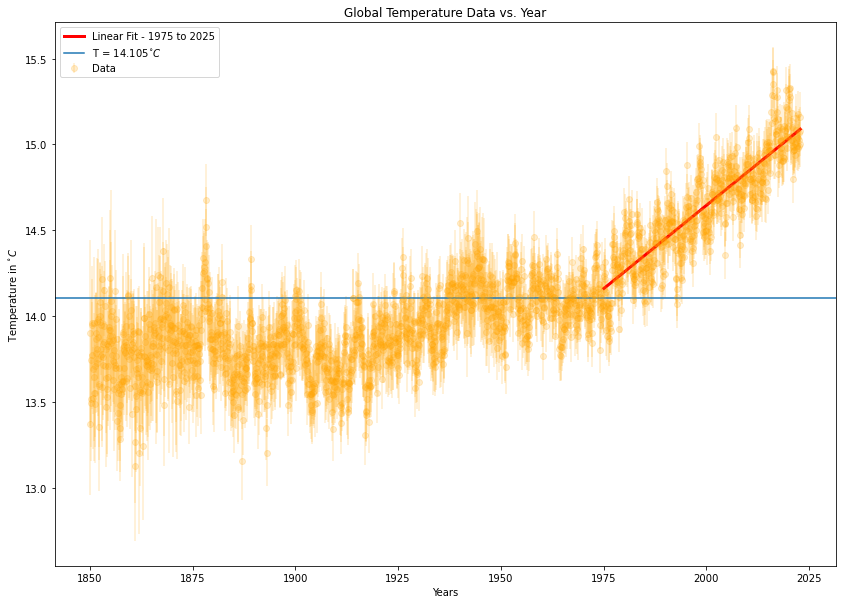

In [3]:
def straightline(x,m,b):
    return m*x + b

listyears = []
listtemps = []
listerrors = []

for i,y in enumerate(data_years):
    if y > 1975:
        listyears.append(y)
        listtemps.append(data_temp[i])
        listerrors.append(data_err[i])

fit_years = np.array(listyears)
fit_temps = np.array(listtemps)
fit_err = np.array(listerrors)

p0 = 0,-5
bfp,err = curve_fit(straightline,fit_years,fit_temps,p0,sigma=fit_err,absolute_sigma=True)

slope = bfp[0]
intercept = bfp[1]

fit = straightline(fit_years,slope,intercept)

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp, yerr = data_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.plot(fit_years,fit, linewidth = 3, color = 'red', label = 'Linear Fit - 1975 to 2025')
plt.axhline(14.105,label='T = 14.105$^{\circ}C$')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.title('Global Temperature Data vs. Year')
plt.show()

__________________________________________________________
Part 3b) (3 pts)

1) Calculate and output the $\chi^2$, dof, and $\chi^2$ probability for the fit

2) Plot
- the data with errorbars for the entire range of years
- the best fit line over the years for the fit
- put labels on the data, fit, axes, etc...

Resulting chi-squared of linear fit: 629.793243985253
Degrees of freedom: 572
Probability from chi-squared test for the linear fit: 0.047078322428370414



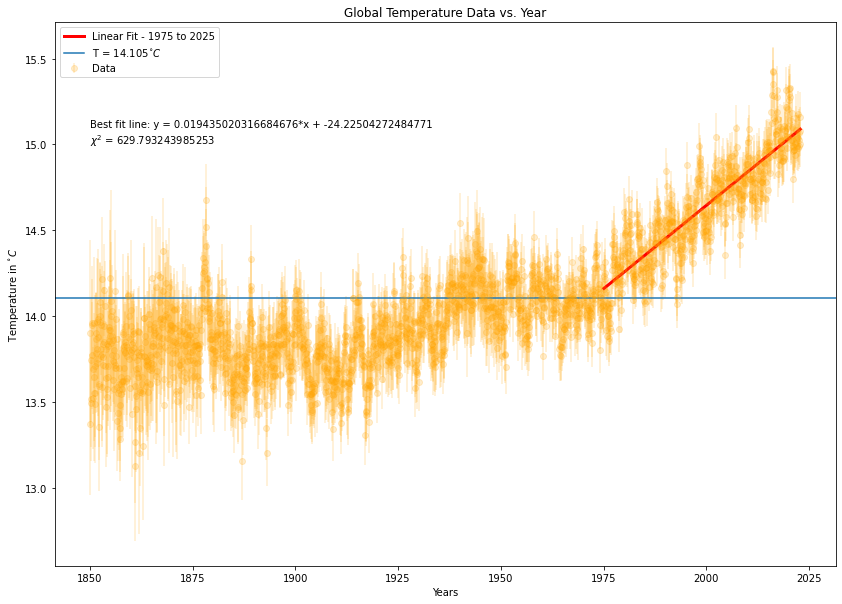

In [4]:
def chi_sqr(theory,data,err):
    return np.sum((theory-data)**2/err**2)

chi2 = chi_sqr(fit,fit_temps,fit_err)
dof = np.size(fit_years) - 2 #two parameters used for fitting
prob = st.chi2.sf(chi2,dof)

print('Resulting chi-squared of linear fit: ' + str(chi2))
print('Degrees of freedom: ' + str(dof))
print('Probability from chi-squared test for the linear fit: ' + str(prob))
print("")

text1 = '$\chi^{2}$ = ' + str(chi2)
text2 = 'Best fit line: y = ' + str(slope) + '*x + ' + str(intercept)

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp, yerr = data_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.plot(fit_years,fit, linewidth = 3, color = 'red', label = 'Linear Fit - 1975 to 2025')
plt.axhline(14.105,label='T = 14.105$^{\circ}C$')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.title('Global Temperature Data vs. Year')
plt.text(1850, 15,text1)
plt.text(1850, 15.1,text2)
plt.show()

_____________________________________________________________
Part 3 Observations: (will depend on range used for linear fit)

For the linear fit that I generated for the data from years 1975 to 2025, visually it appears that our data decently fits the data. However, our $\chi^{2}$ probability came out to be about 4.7% for the likelihood of the linear fit fitting the data. I think our probability comes out to be maybe lower than anticipated due to these spikes up and down in the data due to seasonal changes every year.


_____________________________________________________________

_____________________________________________________________________________
Part 4a) (2 pts)

Fit a Quadratic (i.e. second-order polynomial) to the data using 'curve_fit' ffor the entire range of years


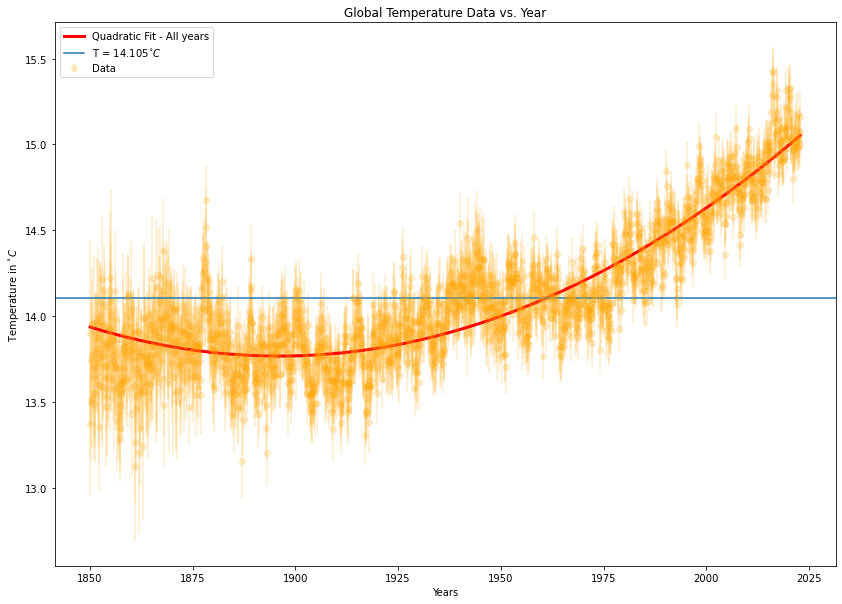

In [5]:
def quadratic(x,a,b,c):
    y = a*x**2 + b*x + c
    return y

p0 = 8e-5,-0.3,301
bfp,err = curve_fit(quadratic,data_years,data_temp,p0,sigma=data_err)

a = bfp[0]
b = bfp[1]
c = bfp[2]

fit_q = quadratic(data_years,a,b,c)

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp,yerr = data_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.plot(data_years,fit_q, linewidth = 3, color = 'red', label = 'Quadratic Fit - All years')
plt.axhline(14.105,label='T = 14.105$^{\circ}C$')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.title('Global Temperature Data vs. Year')
plt.show()

__________________________________________________________
Part 4b) (3 pts)

1) Calculate and output the $\chi^2$, dof, and $\chi^2$ probability for the fit

2) Plot
- the data with errorbars for the entire range of years
- the best fit quadratic over the entire range of years
- put labels on the data, fit, axes, etc...

Resulting chi-squared of quadratic fit: 2004.838142383606
Degrees of freedom: 2071
Probability from chi-squared test for the quadratic fit: 0.8482112403249058



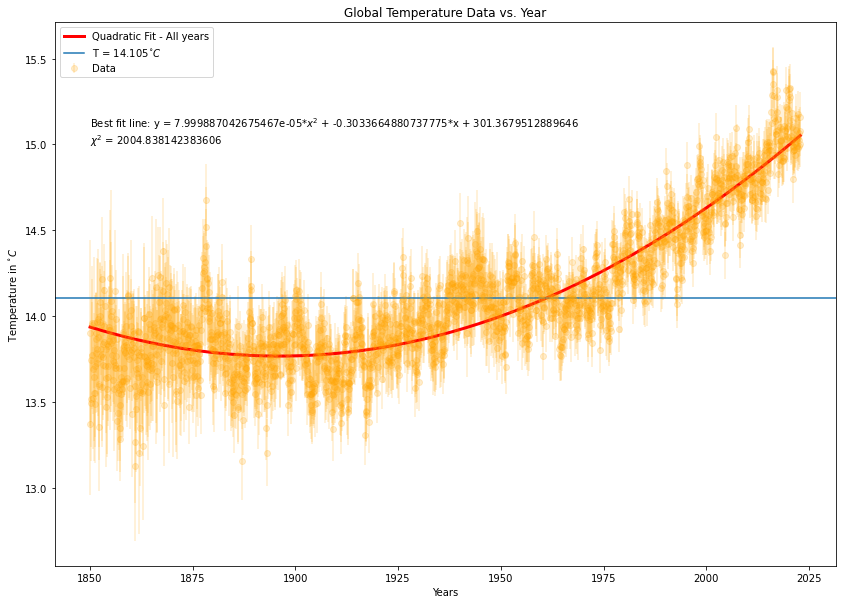

In [6]:
chi2_q = chi_sqr(fit_q,data_temp,data_err)
dof_q = np.size(data_years) - 3 #three parameters used for fitting
prob_q = st.chi2.sf(chi2_q,dof_q)

print('Resulting chi-squared of quadratic fit: ' + str(chi2_q))
print('Degrees of freedom: ' + str(dof_q))
print('Probability from chi-squared test for the quadratic fit: ' + str(prob_q))
print("")

text1 = '$\chi^{2}$ = ' + str(chi2_q)
text2 = 'Best fit line: y = ' + str(a) + '*$x^{2}$ + ' + str(b) + '*x + ' + str(c) 

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp, yerr = data_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.plot(data_years,fit_q, linewidth = 3, color = 'red', label = 'Quadratic Fit - All years')
plt.axhline(14.105,label='T = 14.105$^{\circ}C$')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.title('Global Temperature Data vs. Year')
plt.text(1850, 15,text1)
plt.text(1850, 15.1,text2)
plt.show()

_____________________________________________________________
Part 4 Observations:

Based on the visual fit of the quadratic, it appears to fir the data very well except early on before 1900 and possibly around 1940/1950 where there is a slight spike. From our chi-squared probability, overall the quadratic fit has about an 85% likelihood of fitting the data well.


_____________________________________________________________

Part 5: (2 pts)

Make 2 subplots (2 rows x 1 column)
- top: residuals with errorbars for the straight-line fit for years used in the fit
- bottom: residuals with errorbars for quadratic fit for years used in the fit

Use the same limits on the x-axis for both 1850-2025

______________________________________________________________

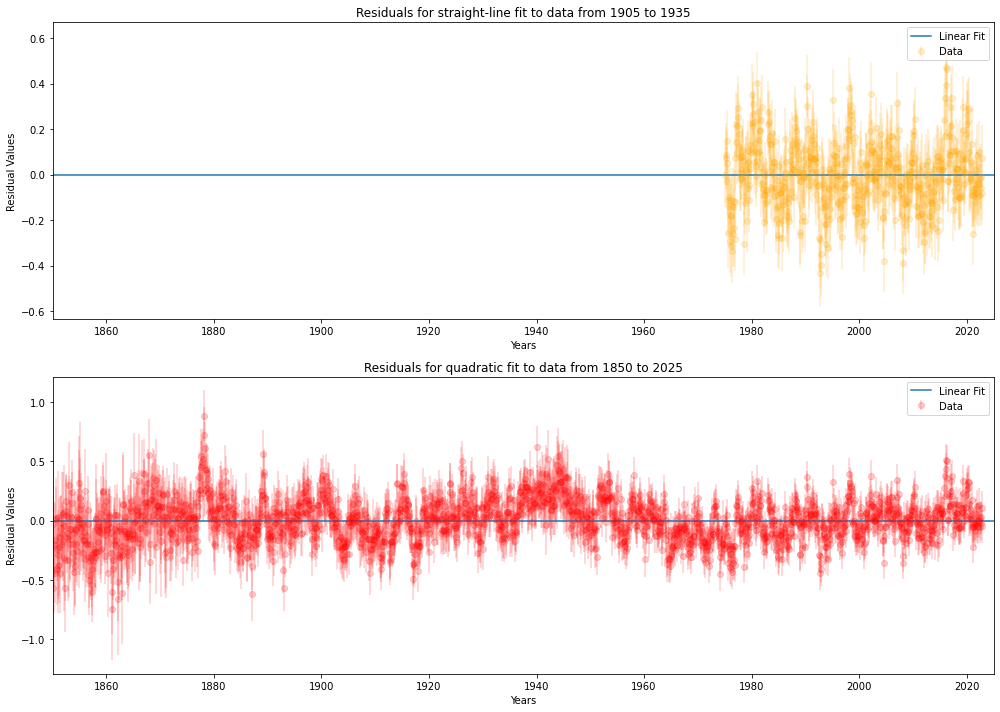

In [7]:
lin_res = fit_temps - fit
quad_res = data_temp - fit_q

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.errorbar(fit_years,lin_res,yerr = fit_err, fmt = 'o', alpha=0.2,color = 'orange', label='Data')
plt.axhline(0,label='Linear Fit')
plt.xlim(1850,2025)
plt.xlabel('Years')
plt.ylabel('Residual Values')
plt.title('Residuals for straight-line fit to data from 1905 to 1935')
plt.legend()

plt.subplot(2,1,2)
plt.errorbar(data_years,quad_res,yerr = data_err, fmt = 'o', alpha=0.2,color = 'red', label='Data')
plt.axhline(0,label='Linear Fit')
plt.xlim(1850,2025)
plt.xlabel('Years')
plt.ylabel('Residual Values')
plt.title('Residuals for quadratic fit to data from 1850 to 2025')
plt.legend()

plt.tight_layout()
plt.show()

_____________________________________________
Part 5 observations: (will depend on range used for linear fit)

One thing I notice right away is that the range of residuals for the quadratic fit is actually higher than the range of residuals for the linear fit. It does, however, look like the majority of points are within the 0 residual line based on the errors for the quadratic fit, whereas for the linear fit it looks like theres much more even mix of points within and outside that horizontal line.
________________________________________________________________

Part 6: (3 pts)

On a single plot show
- data with errorbars
- both fits projected out 100 years
- a horizontal line from 1850-1900 with the mean pre-industrial temperature
- a horizontal line at the 1951-1980 $T_{mean}$
- a horizontal line at $\Delta T = 2 \, ^{\circ}C$ above the pre-industrial temperature

put all appropriate labels, etc... on plot

_______________________________________________________________________

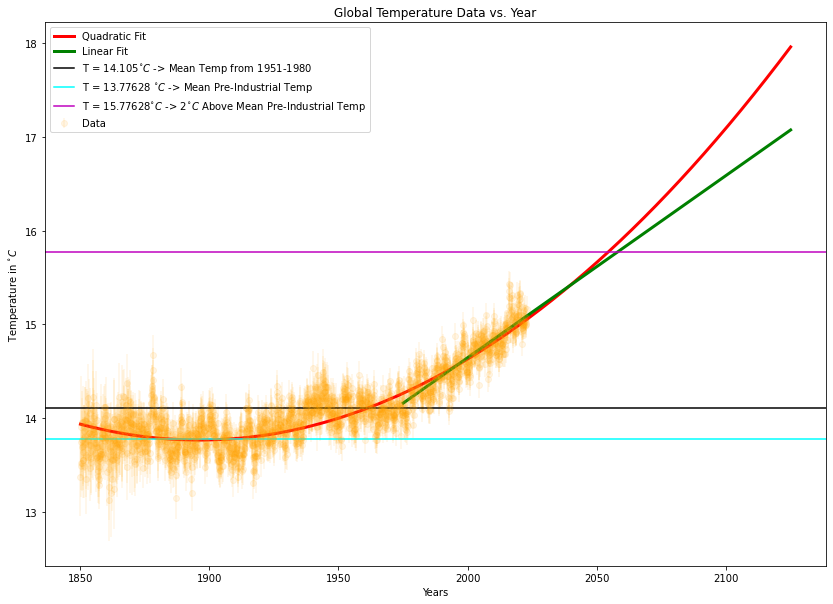

In [8]:
pre_ind_lim = np.where(data_years==1900)
cond = int(pre_ind_lim[0])
preind_mean = np.sum(data_temp[0:cond])/(cond+1)
spacing = 1/12
extended_q_years = np.append(data_years, np.arange(2025,2125 + spacing,spacing))
extended_lin_years = np.append(fit_years, np.arange(2025,2125 + spacing,spacing))
fit_q_exten = quadratic(extended_q_years,a,b,c)
fit_lin_exten = straightline(extended_lin_years,slope,intercept)

plt.figure(figsize=(14,10))
plt.errorbar(data_years,data_temp, yerr = data_err, fmt = 'o',color = 'orange', alpha=0.1, label='Data')
plt.plot(extended_q_years,fit_q_exten, linewidth = 3,color = 'red', label = 'Quadratic Fit')
plt.plot(extended_lin_years,fit_lin_exten, linewidth = 3,color = 'green', label = 'Linear Fit')
plt.axhline(14.105,color = 'black',label='T = 14.105$^{\circ}C$ -> Mean Temp from 1951-1980')
plt.axhline(preind_mean,color = 'cyan',label='T = ' + str(preind_mean) + ' $^{\circ}C$ -> Mean Pre-Industrial Temp')
plt.axhline(preind_mean+2,color = 'm',label='T = ' + str(preind_mean+2) + '$^{\circ}C$ -> 2$^{\circ}C$ Above Mean Pre-Industrial Temp')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature in $^{\circ}C$')
plt.set_cmap('Greens')
plt.title('Global Temperature Data vs. Year')
plt.show()

__________________________________________________________________________
Final Observations and Summary:

One final observation that I can see on the plot above is that the polynomial fit projects out to a much higher final temperature than the linear fit does. The linear fit predicts higher temperatures in the more recent years following 2025, but the polynomial fit catches up just before 2050.

__________________________________________________________________________